In [1]:
import numpy as np
from hipposlam.utils import read_pickle
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm

In [2]:


project_tag = 'Avoidance'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'firing_fields')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
stored_f = metadata['stored_f']
f_pos = metadata['fpos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
trajdf['a'] = trajdf['rota'] * trajdf['rotz']
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  196


,t,x,y,z,rotx,roty,rotz,rota,objID,objID_dist,f_sigma,X,X_Nrow,a
0,128,4.680020,2.807367,0.061624,-1.579231e-03,-0.001579,-0.999998,1.570826,[],[],{},[],0,-1.570822
1,256,4.678977,2.754858,0.058151,-1.903525e-03,-0.001798,-0.999997,1.580309,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [1], '5543_1': [1], '15573_2': [1],...","[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.580304
2,384,4.678577,2.701075,0.058773,-7.499675e-04,-0.000738,-0.999999,1.594632,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [2], '5543_1': [2], '15573_2': [2],...","[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.594631
3,512,4.678619,2.646312,0.059026,-3.263218e-04,-0.000293,-1.000000,1.613886,"[2640, 2717, 5543, 15573, 17158]","[2640_2, 2717_1, 5543_1, 15573_2, 17158_1]","{'2640_2': [3], '5543_1': [3], '15573_2': [3],...","[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...",6,-1.613886
4,640,4.677918,2.591286,0.059130,-1.425992e-04,-0.000069,-1.000000,1.635931,"[1632, 1856, 2640, 2717, 5543, 15573, 17158]","[1632_2, 1856_2, 2640_2, 2717_1, 5543_1, 15573...","{'2640_2': [4], '5543_1': [4], '15573_2': [4],...","[[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [...",8,-1.635931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,1968384,4.108388,-0.634866,0.059201,-2.580587e-04,0.000066,-1.000000,-0.396684,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.396684
15339,1968512,4.156990,-0.614649,0.059201,-2.533233e-04,0.000073,-1.000000,-0.403152,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.403152
15340,1968640,4.205974,-0.593832,0.059201,-1.015182e-04,0.000090,-1.000000,-0.398917,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.398917
15341,1968768,4.256237,-0.573071,0.059201,5.461929e-07,0.000191,-1.000000,-0.393958,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.393958


In [18]:
from scipy.ndimage import gaussian_filter
from hipposlam.comput_utils import divide_ignore
def midedges(edges):
    return (edges[:-1] + edges[1:]) / 2


class BayesianDecoder:
    def __init__(self, xmin, xmax, ymin, ymax, dp, bodysd):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.dp = dp
        self.bodysd = bodysd
        self.bodysd_ind = self.bodysd/self.dp
        self.xedges = np.arange(xmin, xmax+dp, dp)
        self.yedges = np.arange(ymin, ymax+dp, dp)
        self.xedm = midedges(xedges)
        self.yedm = midedges(yedges)

    def compute_occupancy(self, x, y):

        H2d, _, _ = np.histogram2d(x, y, bins=(self.xedges, self.yedges))
        H2d_smooth = gaussian_filter(H2d, sigma=self.bodysd_ind, mode='constant', cval=0)
        return H2d, H2d_smooth

    def compute_spikecounts(self, xsp, ysp):
        H2d, _, _ = np.histogram2d(xsp, ysp, bins=(self.xedges, self.yedges))
        H2d_smooth = gaussian_filter(H2d, sigma=self.bodysd_ind, mode='constant', cval=0)
        return H2d, H2d_smooth

    def compute_ratemap(self, occ, spcounts):
        return divide_ignore(spcounts, occ)



-6 6 -2 4


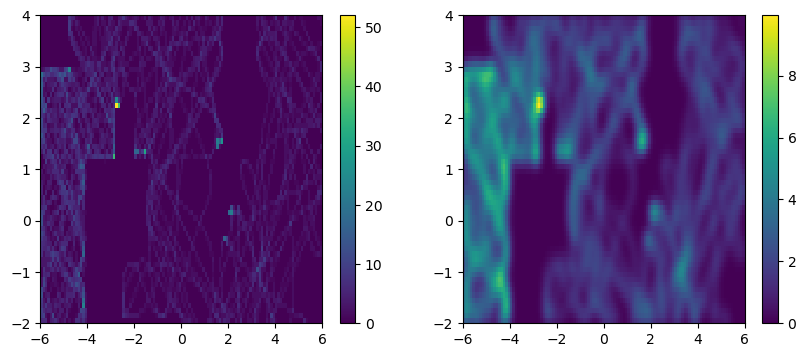

In [21]:
# Compute occpancy
bodysd = 0.15  # body length of the robot = 0.3m
dp = 0.1
xmin = int(trajdf['x'].min() - bodysd)
xmax = int(trajdf['x'].max() + bodysd)
ymin = int(trajdf['y'].min() - bodysd)
ymax = int(trajdf['y'].max() + bodysd)
print(xmin, xmax, ymin, ymax)

BD = BayesianDecoder(xmin, xmax, ymin, ymax, dp, bodysd)

xedges = np.arange(xmin, xmax+dp, dp)
yedges = np.arange(ymin, ymax+dp, dp)
xedm = midedges(xedges)
yedm = midedges(yedges)

occ, occ_gau = BD.compute_occupancy(trajdf['x'].to_numpy(), trajdf['y'].to_numpy())
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
im0 = ax[0].pcolormesh(xedges, yedges, occ.T)
im1 = ax[1].pcolormesh(xedges, yedges, occ_gau.T)
plt.colorbar(im0, ax=ax[0])
plt.colorbar(im1, ax=ax[1])




In [17]:
Num_Fnodes = trajdf['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
fposdict = dict()
for i in range(trajdf.shape[0]):

    Xmat = trajdf['X'][i]
    x = trajdf['x'][i]
    y = trajdf['y'][i]
    a = trajdf['a'][i]
    active_rowIDs = np.where(np.sum(Xmat, axis=1) > 0)[0]

    for rowid in active_rowIDs:
        nodekey = [str(k) for k, v in stored_f.items() if v == rowid][0]
        fposdict[rowid] = f_pos[nodekey.split('_')[0]]


        if rowid in xdict:
            xdict[rowid].append(x)
            ydict[rowid].append(y)
            adict[rowid].append(a)

        else:
            xdict[rowid] = [x]
            ydict[rowid] = [y]
            adict[rowid] = [a]


